In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# NLTK 감정 분석을 위한 라이브러리 다운로드
#nltk.download('vader_lexicon')



In [ ]:
df = pd.read_csv("preprocessed_reviews_data_피터팬_별점.csv" ) #encoding="CP949"


In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_preprocessed,content_token,content_pos
0,29db5b2c-8dd1-41d0-972c-ed06f1f4aea4,Jay,https://play-lh.googleusercontent.com/a/ACg8oc...,앱관리좀 하세요. 틀자마자 허위매물만 엄청 쏟아지는거 같음. 양심진짜...,2,0,2.20.101,2024-11-17,안녕하세요. 피터팬의 좋은방 구하기 입니다. 먼저 불편을 드려 죄송합니다. 피터맨에...,2024-11-18 10:54:46,2.20.101,앱 관리 좀 하세요 틀자마자 허위매물만 엄청 쏟아지는 거 같음 양심진짜,"['앱', '관리', '좀', '하세요', '틀자마자', '허위', '매물', '만...","[('앱', 'Noun'), ('관리', 'Noun'), ('좀', 'Noun'),..."
1,c925e6e4-e2ff-4418-bc9d-f148efaf1815,중고차감독,https://play-lh.googleusercontent.com/a-/ALV-U...,순식간에 결제 됩니다. 완전히 눈뜨고 코 베이는 더러운 기분을 느끼고 싶은분은 앱 ...,1,0,2.20.101,2024-11-16,안녕하세요. 피터팬의 좋은방 구하기입니다.매물 등록 과정에서 불편한 경험을 하셨던 ...,2024-11-19 16:29:00,2.20.101,순식간에 결제 됩니다 완전히 눈 뜨고 코 베이는 더러운 기분을 느끼고 싶은 분은 앱...,"['순식간', '에', '결제', '됩니다', '완전히', '눈', '뜨고', '코...","[('순식간', 'Noun'), ('에', 'Josa'), ('결제', 'Noun'..."
2,981cf351-47e5-4bd5-999c-bb8a3f7f868b,당근,https://play-lh.googleusercontent.com/a-/ALV-U...,매물 올렸는데 어떤건 채팅알람이 안울리고 어떤건 카톡으로 채팅이 왔다고 알려주고 어...,3,0,2.20.100,2024-11-13,안녕하세요. 피터팬의 좋은방 구하기입니다. 피터팬 앱 이용 시 다소 불편을 드려 죄...,2024-11-18 10:50:49,2.20.100,매물 올렸는데 어떤 건 채팅 알람이 안 울리고 어떤 건 카톡으로 채팅이 왔다고 알려...,"['매물', '올렸는데', '어떤', '건', '채팅', '알람', '이', '안'...","[('매물', 'Noun'), ('올렸는데', 'Verb'), ('어떤', 'Adj..."
3,ae1e4998-929e-4c73-bbfa-50878c414655,briant,https://play-lh.googleusercontent.com/a/ACg8oc...,최악의앱. 사진등록한번 하려면 앨범에서 선택할수가 없음. 권한을 항상허용으로해야하는...,1,0,2.20.92,2024-11-03,안녕하세요. 피터팬의 좋은방 구하기입니다. 피터팬 앱 이용 시 다소 불편을 드려 죄...,2024-11-04 09:54:48,2.20.92,최악의 앱 사진 등록 한 번 하려면 앨범에서 선택할 수가 없음 권한을 항상 허용으로...,"['최악', '의', '앱', '사진', '등록', '한', '번', '하려면', ...","[('최악', 'Noun'), ('의', 'Josa'), ('앱', 'Noun'),..."
4,c2e94df7-6822-4ac1-afb2-6a83700af82d,cor vi,https://play-lh.googleusercontent.com/a/ACg8oc...,방 구할 때면 이것저것 신경써야해서 꽤 복잡한데 이 어플은 쏘 심플이라 원하는 조건...,5,1,2.20.90,2024-10-30,안녕하세요. 피터팬의 좋은방 구하기 입니다. 저희 서비스를 이용해 주셔서 감사 드립...,2024-11-04 09:51:42,2.20.90,방 구 할 때면 이것저것 신경 써야 해서 꽤 복잡한데 이 어플은 쏘 심플이라 원하는...,"['방', '구', '할', '때', '면', '이', '것', '저', '것', ...","[('방', 'Noun'), ('구', 'Noun'), ('할', 'Verb'), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,eecf351e-4673-4b39-a311-59257bb67581,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,현명하게 집 구하는 분들에게는 최고네요. 흥하세요!,5,1,1.0.07,2014-11-23,Joon Hyoung님 안녕하세요! 현명하게 방 구할때는 두꺼비세상~ Joon Hy...,2014-11-27 10:29:05,1.0.07,현명하게 집 구하는 분들에게는 최고네요 흥하세요,"['현명하게', '집', '구', '하는', '분', '들', '에게는', '최고'...","[('현명하게', 'Adjective'), ('집', 'Noun'), ('구', '..."
9267,2b55b151-eae2-4c9a-89d6-702cc8350f81,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,가끔씩은 직거래가 중개업소보다 더 빠르게 계약되기도해서 부동산직거래 종종 이용하는데...,5,1,1.0.07,2014-11-22,갑선님 안녕하세요! 두꺼비세상은 개인도 자유롭게 부동산직거래를 이용하실 수 있도록 ...,2014-11-27 10:33:30,1.0.07,가끔씩은 직거래가 중개업소보다 더 빠르게 계약되기도 해서 부동산 직거래 종종 이용하...,"['가끔', '씩', '은', '직거래', '가', '중개업', '소보', '다',...","[('가끔', 'Noun'), ('씩', 'Suffix'), ('은', 'Josa'..."
9268,faca50e4-50cf-496f-a58e-ec281ea4f0c6,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,편리하고 안전하고 완전 좋네요~다른 앱보다 좋은 매물도 훨씬 많은듯!!ㅋ,5,1,1.0.07,2014-11-20,동헌님 안녕하세요.\n\n매물수는 앞으로도 두꺼비세상이 풀어야할 숙제인것 같습니다....,2014-11-21 20:06:21,1.0.07,편리하고 안전하고 완전 좋네요 다른 앱보다 좋은 매물도 훨씬 많은 듯ㅋ,"['편리하고', '안전하고', '완전', '좋네요', '다른', '앱', '보다',...","[('편리하고', 'Adjective'), ('안전하고', 'Adjective'),..."
9269,ea379e6c-e628-4cad-889c-74ade273fa60,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,친구소개로 다운받았는데 너무너무 유용한어플이네요! 덕분에 좋은집 편하게구했습니당!!^^,5,1,1.0.07,2014-11-19,은애님 안녕하세요.\n\n소개해준 친구는 정말 좋은 친구분일것 같다는 생각이 드는군...,2014-11-21 20:04:29,1.0.07,친구 소개로 다운 받았는데 너무너무 유용한 어플이네요 덕분에 좋은 집 편하게 구했습니당,"['친구', '소개', '로', '다운', '받았는데', '너무', '너무', '유...","[('친구', 'Noun'), ('소개', 'Noun'), ('로', 'Josa')..."


# **0. 데이터 전처리 (추가)**

In [ ]:
print(df['content_pos'].head())


0    [('앱', 'Noun'), ('관리', 'Noun'), ('좀', 'Noun'),...
1    [('순식간', 'Noun'), ('에', 'Josa'), ('결제', 'Noun'...
2    [('매물', 'Noun'), ('올렸는데', 'Verb'), ('어떤', 'Adj...
3    [('최악', 'Noun'), ('의', 'Josa'), ('앱', 'Noun'),...
4    [('방', 'Noun'), ('구', 'Noun'), ('할', 'Verb'), ...
Name: content_pos, dtype: object


In [ ]:
# 각 값의 데이터 타입 확인
print(df['content_pos'].apply(type).value_counts())


content_pos
<class 'str'>    9271
Name: count, dtype: int64


In [ ]:
# content_pos 열에서 구문 오류가 있는 데이터 확인
invalid_rows = df[df['content_pos'].apply(lambda x: isinstance(x, str) and (x.count('[') != x.count(']')))]
print(invalid_rows)


Empty DataFrame
Columns: [reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, replyContent, repliedAt, appVersion, content_preprocessed, content_token, content_pos]
Index: []


In [ ]:
import ast

# 문자열로 저장된 리스트를 실제 리스트로 변환
df['content_pos'] = df['content_pos'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# float 타입 값 처리
df['content_pos'] = df['content_pos'].apply(lambda x: x if isinstance(x, list) else [])

In [ ]:
# 각 값의 데이터 타입 확인
print(df['content_pos'].apply(type).value_counts())

content_pos
<class 'list'>    9271
Name: count, dtype: int64


In [ ]:
# 명사만 추출하여 새로운 칼럼 'nouns_only'에 저장
df['nouns_only'] = df['content_pos'].apply(
    lambda x: [word for word, pos in x if pos == 'Noun']
)

# 결과 확인
print(df[['content_pos', 'nouns_only']].head())


                                         content_pos  \
0  [(앱, Noun), (관리, Noun), (좀, Noun), (하세요, Verb)...   
1  [(순식간, Noun), (에, Josa), (결제, Noun), (됩니다, Ver...   
2  [(매물, Noun), (올렸는데, Verb), (어떤, Adjective), (건...   
3  [(최악, Noun), (의, Josa), (앱, Noun), (사진, Noun),...   
4  [(방, Noun), (구, Noun), (할, Verb), (때, Noun), (...   

                                          nouns_only  
0                      [앱, 관리, 좀, 허위, 매물, 거, 양심, 진짜]  
1                  [순식간, 결제, 눈, 코, 베이, 기분, 분, 앱, 가입]  
2  [매물, 건, 채팅, 알람, 안, 건, 카톡, 채팅, 건, 앱, 자체, 알람, 게,...  
3  [최악, 앱, 사진, 등록, 번, 앨범, 선택, 수가, 권한, 항상, 허용, 권한,...  
4    [방, 구, 때, 것, 것, 신경, 꽤, 이, 어플, 심플, 조건, 검색, 볼, 수]  


In [ ]:
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_preprocessed,content_token,content_pos,nouns_only
0,aad0be65-5538-40df-b1e0-281746378256,미르밤,https://play-lh.googleusercontent.com/a-/ALV-U...,아니 왜 모바일 웹사이트는 안들어가지고 무조건 어플을 설치하게 합니까? ㅡㅡ,1,0,NaN,2024-11-12 21:25:45,NaN,NaN,NaN,아니 왜 모바일 웹사이트는 안 들어가지고 무조건 어플을 설치하게 합니까 ㅡㅡ,"['아니', '왜', '모바일', '웹사이트', '는', '안', '들어가지고', ...","[(아니, Adjective), (왜, Noun), (모바일, Noun), (웹사이...","[왜, 모바일, 웹사이트, 안, 무조건, 어플, 설치, 합]"
1,4700ceb5-bf5e-4f92-b597-82c34a68030e,とき,https://play-lh.googleusercontent.com/a-/ALV-U...,"도대체 언제까지 그렇게 우둔한 필터로 쓰라는거죠? 무슨 1층필터도 없고, 그냥 보증...",1,0,NaN,2024-11-10 08:34:10,NaN,NaN,NaN,도대체 언제까지 그렇게 우둔한 필터로 쓰라는 거죠 무슨 1층 필터도 없고 그냥 보증...,"['도대체', '언제', '까지', '그렇게', '우둔한', '필터', '로', '...","[(도대체, Noun), (언제, Noun), (까지, Josa), (그렇게, Ad...","[도대체, 언제, 필터, 거, 무슨, 층, 필터, 그냥, 보증금, 월세, 지층, 제..."
2,97d21f08-2532-411d-9609-75a70d47ccad,초로록,https://play-lh.googleusercontent.com/a-/ALV-U...,매물도 없으면서 푸시알림만 많이 보내서 지워요 그냥 네이버부동산을 보는게 좋을듯,1,0,NaN,2024-11-06 11:20:17,NaN,NaN,NaN,매물도 없으면서 푸시 알림만 많이 보내서 지워요 그냥 네이버 부동산을 보는 게 좋을 듯,"['매물도', '없으면서', '푸시', '알림', '만', '많이', '보내서', ...","[(매물도, Noun), (없으면서, Adjective), (푸시, Noun), (...","[매물도, 푸시, 알림, 그냥, 네이버, 부동산, 게, 듯]"


In [ ]:
from collections import Counter

# 1. 리스트를 하나로 병합 (Flattening)
all_nouns = [word for sublist in df['nouns_only'] for word in sublist]

# 2. 단어 빈도 계산
word_counts = Counter(all_nouns)

# 3. 상위 50개 단어 추출
top_50_words = word_counts.most_common(50)

# 4. 결과 출력
for rank, (word, count) in enumerate(top_50_words, 1):
    print(f"{rank}. {word}: {count}")


1. 매물: 1193
2. 앱: 968
3. 대박: 873
4. 어플: 809
5. 거: 761
6. 방: 735
7. 구: 697
8. 집: 676
9. 요: 647
10. 허위: 646
11. 수: 637
12. 안: 587
13. 것: 536
14. 정말: 474
15. 때: 441
16. 부동산: 420
17. 이: 399
18. 정보: 367
19. 최고: 315
20. 사용: 263
21. 듯: 243
22. 추천: 238
23. 보기: 235
24. 진짜: 230
25. 다른: 225
26. 피터팬: 221
27. 직거래: 217
28. 볼: 214
29. 짱: 193
30. 좀: 189
31. 완전: 175
32. 게: 172
33. 연락: 162
34. 이용: 160
35. 사진: 159
36. 수수료: 149
37. 왜: 147
38. 확인: 142
39. 보고: 140
40. 더: 132
41. 검색: 126
42. 신고: 123
43. 데: 119
44. 용: 119
45. 아주: 116
46. 개: 115
47. 도움: 115
48. 찾기: 115
49. 여: 113
50. 등록: 112


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용 시


# 마이너스 폰트 설정 (음수 표시 문제 해결)
plt.rcParams['axes.unicode_minus'] = False


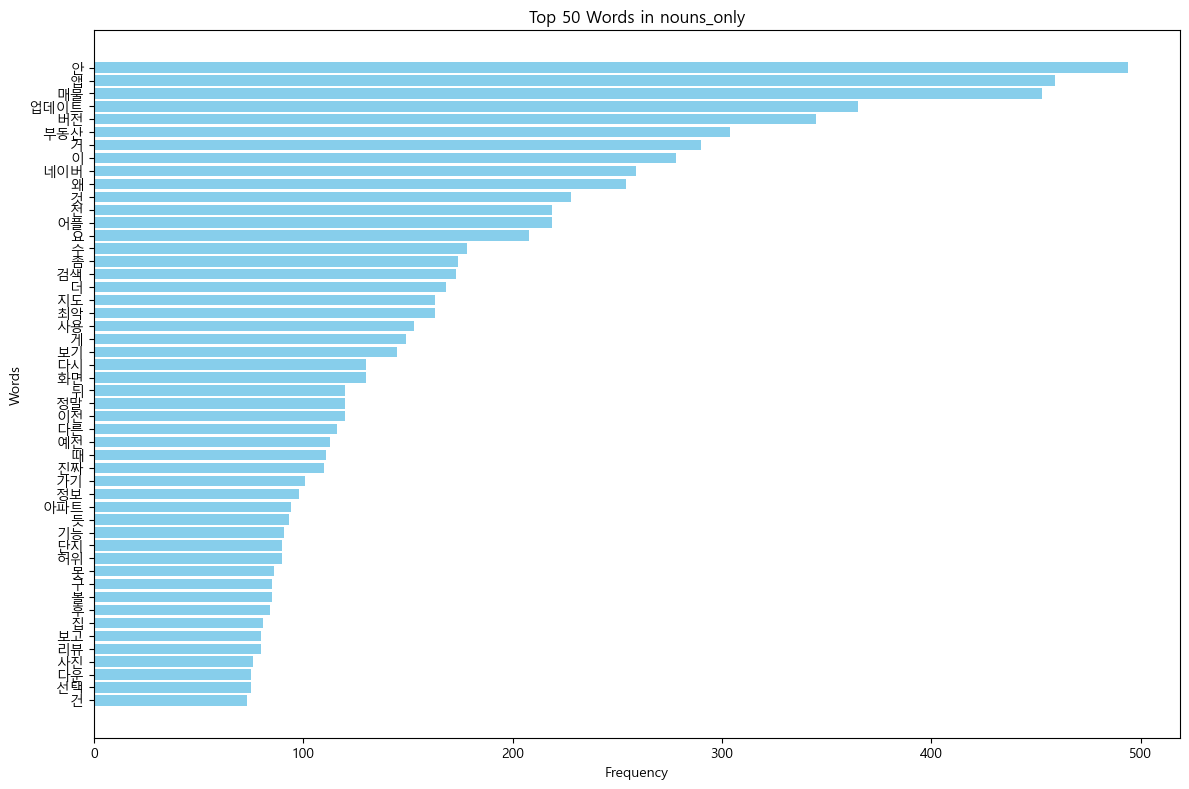

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
words, counts = zip(*top_50_words)

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(words[::-1], counts[::-1], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Words in nouns_only")
plt.tight_layout()
plt.show()


In [ ]:
# 불용어 파일 로드
with open('stopword.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()  # 파일 내용 한 줄씩 읽어서 리스트로 저장


In [ ]:
# 불용어 제거 함수
def remove_stopwords(nouns):
    return [noun for noun in nouns if noun not in stopwords]


In [ ]:
# 불용어 제거 적용
df['nouns_without_stopwords'] = df['nouns_only'].apply(remove_stopwords)


In [ ]:
# 결과 확인
df[['nouns_only', 'nouns_without_stopwords']].head()


,nouns_only,nouns_without_stopwords
0,"[앱, 관리, 좀, 허위, 매물, 거, 양심, 진짜]","[앱, 관리, 허위, 매물, 양심]"
1,"[순식간, 결제, 눈, 코, 베이, 기분, 분, 앱, 가입]","[순식간, 결제, 눈, 코, 베이, 기분, 분, 앱, 가입]"
2,"[매물, 건, 채팅, 알람, 안, 건, 카톡, 채팅, 건, 앱, 자체, 알람, 게,...","[매물, 채팅, 알람, 안, 카톡, 채팅, 앱, 자체, 알람, 프로필, 보라색, 바..."
3,"[최악, 앱, 사진, 등록, 번, 앨범, 선택, 수가, 권한, 항상, 허용, 권한,...","[최악, 앱, 사진, 등록, 번, 앨범, 선택, 수가, 권한, 항상, 허용, 권한,..."
4,"[방, 구, 때, 것, 것, 신경, 꽤, 이, 어플, 심플, 조건, 검색, 볼, 수]","[방, 신경, 꽤, 어플, 심플, 조건, 검색, 볼]"


In [ ]:
from collections import Counter

# 1. 리스트를 하나로 병합 (Flattening)
all_nouns = [word for sublist in df['nouns_without_stopwords'] for word in sublist]

# 2. 단어 빈도 계산
word_counts = Counter(all_nouns)

# 3. 상위 50개 단어 추출
top_50_words = word_counts.most_common(50)

# 4. 결과 출력
for rank, (word, count) in enumerate(top_50_words, 1):
    print(f"{rank}. {word}: {count}")


1. 매물: 1193
2. 앱: 968
3. 대박: 873
4. 어플: 809
5. 방: 735
6. 집: 676
7. 허위: 646
8. 안: 587
9. 부동산: 420
10. 정보: 367
11. 최고: 315
12. 사용: 263
13. 추천: 238
14. 보기: 235
15. 피터팬: 221
16. 직거래: 217
17. 볼: 214
18. 짱: 193
19. 완전: 175
20. 연락: 162
21. 이용: 160
22. 사진: 159
23. 수수료: 149
24. 확인: 142
25. 보고: 140
26. 검색: 126
27. 신고: 123
28. 데: 119
29. 용: 119
30. 아주: 116
31. 개: 115
32. 도움: 115
33. 찾기: 115
34. 등록: 112
35. 두꺼비: 112
36. 중: 111
37. 말: 108
38. 굿굿: 108
39. 카페: 105
40. 계속: 104
41. 필터: 99
42. 중개: 99
43. 내: 99
44. 곳: 98
45. 굿: 97
46. 삭제: 96
47. 관리: 95
48. 번: 94
49. 광고: 94
50. 짱짱: 93


In [ ]:
# DataFrame을 CSV 파일로 저장
df.to_csv('preprocessed2_reviews_data_피터팬_별점.csv', index=False, encoding='utf-8-sig')


# **1. 토픽 모델링 (기본)**

In [ ]:
df1 = pd.read_csv("preprocessed2_reviews_data_피터팬_별점.csv" )
df2 = pd.read_csv("preprocessed2_reviews_data_네이버부동산_별점.csv" )
df3 = pd.read_csv("preprocessed2_reviews_data_직방_별점.csv" )
df4 = pd.read_csv("preprocessed2_reviews_data_다방_별점.csv" )
df5 = pd.read_csv("preprocessed2_reviews_data_호갱노노_별점.csv" )



In [ ]:
# 각 df에서 'nouns_without_stopwords' 칼럼을 공백 없이 이어붙여 문자열로 변환
reviews_df1 = df1['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))
reviews_df2 = df2['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))
reviews_df3 = df3['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))
reviews_df4 = df4['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))
reviews_df5 = df5['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))

# 여러 데이터프레임의 'nouns_without_stopwords' 칼럼을 합쳐서 하나의 변수에 저장
reviews = pd.concat([reviews_df1, reviews_df2, reviews_df3, reviews_df4, reviews_df5], ignore_index=True)

# 결과 확인
reviews.head()

0                        ['앱', '관리', '허위', '매물', '양심']
1    ['순식간', '결제', '눈', '코', '베이', '기분', '분', '앱', ...
2    ['매물', '채팅', '알람', '안', '카톡', '채팅', '앱', '자체',...
3    ['최악', '앱', '사진', '등록', '번', '앨범', '선택', '수가',...
4        ['방', '신경', '꽤', '어플', '심플', '조건', '검색', '볼']
Name: nouns_without_stopwords, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['이', '가', '을', '를', '에', '에서', '의', '도', '는', '한', '하다', '다시', '그냥' ]
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 8  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
검색 기능 필터 지도 설정 선택 조건 옵션 오류 업데이트
Topic #2:
어플 최고 직방 사용 완전 이용 도움 업데이트 사진 부동산
Topic #3:
정보 보기 추천 아파트 별로 위치 주변 시세 부동산 사진
Topic #4:
방이 직방 이사 다운 다시 덕분 삭제 직거래 발품 감사
Topic #5:
다방 매물 월세 아주 부동산 계약 전세 이용 생각 보고
Topic #6:
원룸 찾기 부동산 필요 자취 설명 지역 투룸 오피스텔 서울
Topic #7:
매물 허위 직방 부동산 대박 관리 가격 그냥 사진 신고
Topic #8:
매물 연락 부동산 광고 사람 보고 전화 허위 계속 신고


**전체 리뷰로 토픽 모델을 돌릴 때 문제점**
- 앱 별로 전체 데이터를 사용했을 때 직방, 다방처럼 리뷰가 많은 데이터가 하나의 토픽으로 나오는 경우 발생
- 우리의 취지와 맞지 않기 때문에 앱별로 동일한 개수의 데이터 활용

In [ ]:
# 'at' 칼럼을 날짜 형식으로 변환
df1['at'] = pd.to_datetime(df1['at'], errors='coerce')
df2['at'] = pd.to_datetime(df2['at'], errors='coerce')
df3['at'] = pd.to_datetime(df3['at'], errors='coerce')
df4['at'] = pd.to_datetime(df4['at'], errors='coerce')
df5['at'] = pd.to_datetime(df5['at'], errors='coerce')

# 2020년 이후 데이터만 필터링
df1 = df1[df1['at'] >= '2020-01-01']
df2 = df2[df2['at'] >= '2020-01-01']
df3 = df3[df3['at'] >= '2020-01-01']
df4 = df4[df4['at'] >= '2020-01-01']
df5 = df5[df5['at'] >= '2020-01-01']

# 필터링된 결과를 출력
print(f"df1 필터링된 데이터: {df1.shape}")
print(f"df2 필터링된 데이터: {df2.shape}")
print(f"df3 필터링된 데이터: {df3.shape}")
print(f"df4 필터링된 데이터: {df4.shape}")
print(f"df5 필터링된 데이터: {df5.shape}")


df1 필터링된 데이터: (931, 16)
df2 필터링된 데이터: (684, 16)
df3 필터링된 데이터: (3817, 16)
df4 필터링된 데이터: (6502, 16)
df5 필터링된 데이터: (1118, 16)


In [ ]:
import pandas as pd

# 각 앱별로 필터링된 데이터프레임을 리스트로 묶음
dfs = [df1, df2, df3, df4, df5]

# 각 앱별 리뷰 개수 확인
min_reviews_count = min([len(df) for df in dfs])  # 가장 적은 리뷰 개수

# 1. 각 앱별로 동일한 개수의 리뷰 샘플링
sampled_data = []
for df in dfs:
    sampled_data.append(df.sample(n=min_reviews_count, random_state=42))  # 동일한 개수로 샘플링

# 2. 샘플링된 데이터를 합침
balanced_df = pd.concat(sampled_data, ignore_index=True)

# 3. 리뷰 데이터 전처리: 공백 없이 문자열로 변환
reviews = balanced_df['nouns_without_stopwords'].dropna().apply(lambda x: ''.join(x))



### **모픽 개수: 5개~10개**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다','자꾸', '계속', '다시', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 5  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
매물 허위 사진 신고 연락 어플 보고 관리 전화 확인
Topic #2:
어플 매물 이용 전세 원룸 사용 가격 관리 덕분 월세
Topic #3:
정보 지도 로그인 보기 위치 버튼 기능 화면 도움 시세
Topic #4:
업데이트 어플 아파트 오류 알림 사람 설치 삭제 댓글 종료
Topic #5:
아파트 필터 검색 수정 기능 거래 개선 어플 조건 선택


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다', '다시','때문','자꾸', '계속','덕분', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 6  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
아파트 업데이트 최고 단점 거래 보기 관심 이야기 기능 매매
Topic #2:
매물 어플 허위 신고 관리 이용 정보 시세 사람 도움
Topic #3:
어플 알림 기능 확인 거래 등록 최악 표시 사람 댓글
Topic #4:
업데이트 어플 로그인 설치 삭제 지도 종료 가격 문의 버튼
Topic #5:
매물 허위 필터 검색 어플 보고 연락 계약 월세 전세
Topic #6:
정보 화면 지도 사용 오류 사진 어플 수정 개선 이용


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다','보고', '다시','때문','자꾸', '계속','덕분', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 7  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
매물 허위 어플 연락 신고 사진 계약 전화 확인 중개사
Topic #2:
관리 전세 필터 월세 보기 매물 댓글 방이 어플 업데이트
Topic #3:
정보 아파트 검색 원룸 어플 거래 필터 사용 면적 시세
Topic #4:
업데이트 오류 로그인 로딩 수가 쓰레기 어플 확인 지도 일시
Topic #5:
어플 검색 기능 설정 지도 필터 사용 매물 조건 알림
Topic #6:
설치 버튼 종료 이용 아파트 화면 오피스텔 업데이트 예전 사용
Topic #7:
아파트 삭제 문의 어플 단점 답변 사람 이야기 수정 장점


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다','보고','갑자기', '방이', '예전', '다시','때문','자꾸', '계속','덕분', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 8  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
업데이트 오류 설치 화면 지도 버튼 종료 로그인 삭제 사진
Topic #2:
등록 수정 정보 문의 답변 이야기 아파트 사람 댓글 사용
Topic #3:
매물 정보 전세 사진 월세 확인 관리 시설 가격 계약
Topic #4:
아파트 사용 어플 거래 별로 확인 표시 화면 가격 이사
Topic #5:
이용 면적 계약 사용 월세 기준 매물도 전용 단위 사람
Topic #6:
어플 업데이트 최고 아파트 도움 쓰레기 리뷰 관리 정보 삭제
Topic #7:
필터 검색 기능 매물 선택 조건 아파트 설정 원룸 어플
Topic #8:
매물 허위 신고 어플 연락 관리 중개사 전화 문의 광고


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다','보고','갑자기','이야기', '방이', '예전', '다시','때문','자꾸', '계속','덕분', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 9  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
업데이트 오류 사진 설치 지도 버튼 매물 종료 확인 삭제
Topic #2:
아파트 삭제 댓글 단점 신고 사람 어플 쓰레기 접속 생각
Topic #3:
검색 기능 매물 알림 아파트 보기 수정 조건 추가 가능
Topic #4:
정보 도움 가격 아파트 관리 자주 연결 표기 지금 사람
Topic #5:
매물 로그인 원룸 시세 어플 투룸 아파트 사용 자체 기능
Topic #6:
매물 허위 어플 신고 연락 관리 계약 중개사 전화 사진
Topic #7:
어플 정보 화면 이용 사용 문의 지도 위치 시설 가격
Topic #8:
월세 아파트 면적 아주 광고 전세 정보 대한 전용 금액
Topic #9:
필터 사용 선택 설정 전세 관리 조건 기능 최고 옵션


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 데이터를 벡터화
stop_words_korean = ['부동산', '하다','보고','하나요', '자주', '생각','매우', '아주','장점', '단점','갑자기','이야기', '방이', '예전', '다시','때문','자꾸', '계속','덕분', '그냥', '네이버', '호갱', '노노','다방', '직방','피터팬']
vectorizer = CountVectorizer(stop_words=stop_words_korean, max_features=5000)
X = vectorizer.fit_transform(reviews)

# LDA 모델 학습
num_topics = 10  # 원하는 토픽 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 토픽에 대한 주요 단어 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda_model, vectorizer.get_feature_names_out())


Topic #1:
버튼 화면 검색 조건 선택 면적 필터 매물 기능 설정
Topic #2:
아파트 어플 사람 댓글 삭제 신고 확인 리뷰 거래 정보
Topic #3:
업데이트 지도 종료 버전 이후 화면 도움 건가 매매 접속
Topic #4:
이용 설치 삭제 어플 신고 갤럭시 사용자 서비스 조치 수가
Topic #5:
어플 원룸 선택 이용 거래 매물 정보 아파트 부분 필터
Topic #6:
정보 어플 필터 사용 평수 전세 추가 검색 기능 아파트
Topic #7:
매물 허위 어플 신고 관리 가격 광고 계약 연락 전세
Topic #8:
검색 아파트 정보 기능 알림 필터 보기 시세 시설 별로
Topic #9:
로그인 오류 최고 일시 오피스텔 어플 사용 주택 로딩 페이
Topic #10:
매물 사진 허위 문의 중개사 전화 연락 등록 답변 수정


#### **토픽 모델링 결과**

토픽의 분류와 특징을 고려한 분석
주어진 5~10개의 토픽 결과를 비교했을 때, 6개의 토픽이 가장 적절한 분류를 보여줍니다.
6개의 토픽은 주요 키워드와 그 특성이 명확하게 나뉘며, 서로 중복되지 않고 각 주제를 잘 대변합니다.

- 선택한 토픽 개수: 6개
- 6개의 토픽을 대표하는 단어
- Topic #1: 아파트 업데이트 최고 단점
  - "아파트 거래 리뷰"
(주요 키워드로 거래와 관련된 단점, 아파트 중심 리뷰를 다룸)

- Topic #2: 매물 어플 허위 신고 관리
   - "매물 관리 및 신고"
(허위 매물 신고와 관리 문제에 대한 내용을 대변)

- Topic #3: 어플 알림 기능 확인 거래 등록
   - "기능과 거래 등록"
(어플의 기능성, 거래 과정, 알림과 관련된 논의)

- Topic #4: 업데이트 어플 로그인 설치 삭제
   - "어플 사용 및 설치 문제"
(업데이트, 로그인 문제, 설치 및 삭제에 대한 기술적 이슈)

- Topic #5: 매물 허위 필터 검색 어플 보고
   - "매물 검색과 필터"
(매물 검색의 필터링 및 허위 매물의 이슈)

- Topic #6: 정보 화면 지도 사용 오류 사진
   - "지도와 시각적 정보"
(지도와 사진, 화면을 활용한 정보 제공과 그 오류)

**이유**
- 6개의 토픽은 서로 다른 주요 기능(검색, 거래, 오류, 신고 등)을 독립적으로 포괄하며, 키워드 간 중복이 적음.
- 5개는 범위가 넓고 일반화되어 각 토픽의 고유성을 잃음.
- 7개 이상은 일부 토픽이 너무 세분화되어, 특정 키워드의 중요성이 약해지는 경향이 있음.
  
**추가 작업 제안**
- 각 토픽에 속한 리뷰를 수집해 토픽의 대표 사례를 확인.
- 토픽별 비중을 비교해 어떤 이슈가 가장 중요하게 나타나는지 분석 가능.

In [ ]:
balanced_df.to_csv('토픽모델링용 데이터.csv', index=False, encoding='utf-8-sig')

# **2. 토픽모델링 (심화)**

In [ ]:
df1

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_preprocessed,content_token,content_pos,nouns_only,nouns_without_stopwords
0,29db5b2c-8dd1-41d0-972c-ed06f1f4aea4,Jay,https://play-lh.googleusercontent.com/a/ACg8oc...,앱관리좀 하세요. 틀자마자 허위매물만 엄청 쏟아지는거 같음. 양심진짜...,2,0,2.20.101,2024-11-17,안녕하세요. 피터팬의 좋은방 구하기 입니다. 먼저 불편을 드려 죄송합니다. 피터맨에...,2024-11-18 10:54:46,2.20.101,앱 관리 좀 하세요 틀자마자 허위매물만 엄청 쏟아지는 거 같음 양심진짜,"['앱', '관리', '좀', '하세요', '틀자마자', '허위', '매물', '만...","[('앱', 'Noun'), ('관리', 'Noun'), ('좀', 'Noun'),...","['앱', '관리', '좀', '허위', '매물', '거', '양심', '진짜']","['앱', '관리', '허위', '매물', '양심']"
1,c925e6e4-e2ff-4418-bc9d-f148efaf1815,중고차감독,https://play-lh.googleusercontent.com/a-/ALV-U...,순식간에 결제 됩니다. 완전히 눈뜨고 코 베이는 더러운 기분을 느끼고 싶은분은 앱 ...,1,0,2.20.101,2024-11-16,안녕하세요. 피터팬의 좋은방 구하기입니다.매물 등록 과정에서 불편한 경험을 하셨던 ...,2024-11-19 16:29:00,2.20.101,순식간에 결제 됩니다 완전히 눈 뜨고 코 베이는 더러운 기분을 느끼고 싶은 분은 앱...,"['순식간', '에', '결제', '됩니다', '완전히', '눈', '뜨고', '코...","[('순식간', 'Noun'), ('에', 'Josa'), ('결제', 'Noun'...","['순식간', '결제', '눈', '코', '베이', '기분', '분', '앱', ...","['순식간', '결제', '눈', '코', '베이', '기분', '분', '앱', ..."
2,981cf351-47e5-4bd5-999c-bb8a3f7f868b,당근,https://play-lh.googleusercontent.com/a-/ALV-U...,매물 올렸는데 어떤건 채팅알람이 안울리고 어떤건 카톡으로 채팅이 왔다고 알려주고 어...,3,0,2.20.100,2024-11-13,안녕하세요. 피터팬의 좋은방 구하기입니다. 피터팬 앱 이용 시 다소 불편을 드려 죄...,2024-11-18 10:50:49,2.20.100,매물 올렸는데 어떤 건 채팅 알람이 안 울리고 어떤 건 카톡으로 채팅이 왔다고 알려...,"['매물', '올렸는데', '어떤', '건', '채팅', '알람', '이', '안'...","[('매물', 'Noun'), ('올렸는데', 'Verb'), ('어떤', 'Adj...","['매물', '건', '채팅', '알람', '안', '건', '카톡', '채팅', ...","['매물', '채팅', '알람', '안', '카톡', '채팅', '앱', '자체',..."
3,ae1e4998-929e-4c73-bbfa-50878c414655,briant,https://play-lh.googleusercontent.com/a/ACg8oc...,최악의앱. 사진등록한번 하려면 앨범에서 선택할수가 없음. 권한을 항상허용으로해야하는...,1,0,2.20.92,2024-11-03,안녕하세요. 피터팬의 좋은방 구하기입니다. 피터팬 앱 이용 시 다소 불편을 드려 죄...,2024-11-04 09:54:48,2.20.92,최악의 앱 사진 등록 한 번 하려면 앨범에서 선택할 수가 없음 권한을 항상 허용으로...,"['최악', '의', '앱', '사진', '등록', '한', '번', '하려면', ...","[('최악', 'Noun'), ('의', 'Josa'), ('앱', 'Noun'),...","['최악', '앱', '사진', '등록', '번', '앨범', '선택', '수가',...","['최악', '앱', '사진', '등록', '번', '앨범', '선택', '수가',..."
4,c2e94df7-6822-4ac1-afb2-6a83700af82d,cor vi,https://play-lh.googleusercontent.com/a/ACg8oc...,방 구할 때면 이것저것 신경써야해서 꽤 복잡한데 이 어플은 쏘 심플이라 원하는 조건...,5,1,2.20.90,2024-10-30,안녕하세요. 피터팬의 좋은방 구하기 입니다. 저희 서비스를 이용해 주셔서 감사 드립...,2024-11-04 09:51:42,2.20.90,방 구 할 때면 이것저것 신경 써야 해서 꽤 복잡한데 이 어플은 쏘 심플이라 원하는...,"['방', '구', '할', '때', '면', '이', '것', '저', '것', ...","[('방', 'Noun'), ('구', 'Noun'), ('할', 'Verb'), ...","['방', '구', '때', '것', '것', '신경', '꽤', '이', '어플'...","['방', '신경', '꽤', '어플', '심플', '조건', '검색', '볼']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,eecf351e-4673-4b39-a311-59257bb67581,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,현명하게 집 구하는 분들에게는 최고네요. 흥하세요!,5,1,1.0.07,2014-11-23,Joon Hyoung님 안녕하세요! 현명하게 방 구할때는 두꺼비세상~ Joon Hy...,2014-11-27 10:29:05,1.0.07,현명하게 집 구하는 분들에게는 최고네요 흥하세요,"['현명하게', '집', '구', '하는', '분', '들', '에게는', '최고'...","[('현명하게', 'Adjective'), ('집', 'Noun'), ('구', '...","['집', '구', '분', '최고', '흥']","['집', '분', '최고']"
9267,2b55b151-eae2-4c9a-89d6-702cc8350f81,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,가끔씩은 직거래가 중개업소보다 더 빠르게 계약되기도해서 부동산직거래 종종 이용하는데...,5,1,1.0.07,2014-11-22,갑선님 안녕하세요! 두꺼비세상은 개인도 자유롭게 부동산직거래를 이용하실 수 있도록 ...,2014-11-27 10:33:30,1.0.07,가끔씩은 직거래가 중개업소보다 더 빠르게 계약되기도 해서 부동산 직거래 종종 이용하...,"['가끔', '씩', '은', '직거래', '가', '중개업', '소보', '다',...","[('가끔', 'Noun'), ('씩', 'Suffix'), ('은', 'Josa'...","['가끔', '직거래', '중개업', '소보', '더', '계약', '기도', '부...","['가끔', '직거래', '중개업', '소보', '계약', '기도', '부동산', ..."
9268,faca50e4-50cf-496f-a58e-ec281ea4f0c6,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,편리하고 안전하고 완전 좋네요~다른 앱보다 좋은 매물도 훨씬 많은듯!!ㅋ,5,1,1.0.07,2014-11-20,동헌님 안녕하세요.\n\n매물수는 앞으로도 두꺼비세상이 풀어야할 숙제인것 같습니다....,2014-11-21 20:06:21,1.0.07,편리하고 안전하고 완전 좋네요 다른 앱보다 좋은 매물도 훨씬 많은 듯ㅋ,"['편리하고', '안전하고', '완전', '좋네요', '다른', '앱', '보다',...","[(

In [ ]:
pip uninstall umap-learn


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall umap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
import hdbscan
from bertopic import BERTopic

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\user\anaconda3\Lib\site-packages\umap\__init__.py)

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\user\anaconda3\Lib\site-packages\umap\__init__.py)

In [ ]:


# 1. 문서 임베딩 (SBERT 사용)
# SBERT 모델을 사용하여 텍스트를 임베딩 벡터로 변환
model = SentenceTransformer('all-MiniLM-L6-v2')  # SBERT 모델 선택

# df1~df5에서 'nouns_without_stopwords' 열의 데이터를 하나로 합침
documents = pd.concat([df1['nouns_without_stopwords'],
                       df2['nouns_without_stopwords'],
                       df3['nouns_without_stopwords'],
                       df4['nouns_without_stopwords'],
                       df5['nouns_without_stopwords']]).dropna().apply(lambda x: ' '.join(x))

# 문서들을 임베딩 벡터로 변환
embeddings = model.encode(documents, show_progress_bar=True)

# 2. 차원 축소 (UMAP)
# UMAP을 사용하여 임베딩 벡터를 2D로 축소
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine')
umap_embeddings = umap_model.fit_transform(embeddings)

# 3. 클러스터링 (HDBSCAN)
# HDBSCAN을 사용하여 클러스터링
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='leaf')
hdbscan_labels = hdbscan_model.fit_predict(umap_embeddings)

# 4. 토픽 모델링 (BERTopic)
# BERTopic을 사용하여 토픽 모델링을 진행
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)
topics, probabilities = topic_model.fit_transform(documents)

# 5. 도출된 토픽들 확인
# 토픽별 주요 단어를 출력
for topic_num in range(len(topic_model.get_topics())):
    print(f"Topic #{topic_num + 1}:")
    print(topic_model.get_topic(topic_num))


ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\user\anaconda3\Lib\site-packages\umap\__init__.py)

# **3. 감정 분석**